In [43]:
import pandas as pd
from pytrade.io import adj_close_ipc
from pytrade.backtest import pf_backtest
from pytrade.portfolio import max_sharpe_portfolio, xsection_mean_reversion_portfolio
import datetime
import numpy as np
%matplotlib inline

In [44]:
start = datetime.date(2016,1,1)
end = datetime.datetime.today()
data = adj_close_ipc(start,end)
capital = 50000

## Segments: 

industrial = ['ALFAA.MX', 'GCARSOA1.MX','ICA.MX','KIMBERA.MX','MEXCHEM.MX','OHLMEX.MX']
aerop = ['ASURB.MX','GAPB.MX','VOLARA.MX']
bancos = ['GFINBURO.MX','GFNORTEO.MX','GFREGIOO.MX','SANMEXB.MX']
retail = ['AC.MX','BIMBOA.MX','GRUMAB.MX','KOFL.MX','LALAB.MX']
materiales = ['ALPEKA.MX','CEMEXCPO.MX','GMEXICOB.MX']
telco = ['AMXL.MX','TLEVISACPO.MX']
otros = ['ALSEA.MX','ELEKTRA.MX','LIVEPOLC-1.MX','WALMEX.MX']

#print data.columns.values
#data = data[retail]

In [45]:
data.head()

,AC.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BIMBOA.MX,CEMEXCPO.MX,ELEKTRA.MX,GAPB.MX,...,LALAB.MX,LIVEPOLC-1.MX,MEXCHEM.MX,OHLMEX.MX,OMAB.MX,PINFRA.MX,SANMEXB.MX,TLEVISACPO.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,103.04119,34.065,24.14,59.19761,11.67206,239.17,45.7321,9.06731,376.20,150.27,...,39.54,209.11,38.03443,18.04,80.73,201.766,29.71688,94.01,29.55,42.76170
2016-01-04,100.49174,33.706,23.81,58.28764,11.58539,233.68,44.8066,8.76923,365.66,146.83,...,39.37,208.83,38.24189,18.01,78.96,201.965,28.94080,92.30,28.65,42.12258
2016-01-05,99.53693,33.956,23.47,58.76241,11.52760,228.52,45.5530,8.64423,354.62,146.20,...,39.62,209.42,38.10359,18.15,78.77,202.592,29.19622,91.57,28.66,41.94560
2016-01-06,100.89532,33.616,22.48,58.54481,11.30610,227.48,45.7520,8.62500,340.09,145.27,...,39.63,205.99,37.59976,18.06,79.21,198.850,29.14710,90.09,29.39,41.67029
2016-01-07,99.57630,31.428,22.22,56.30945,10.92089,226.25,45.9611,7.94231,331.65,139.67,...,38.80,208.60,36.01910,17.64,78.15,195.814,27.99772,89.91,29.00,39.32031


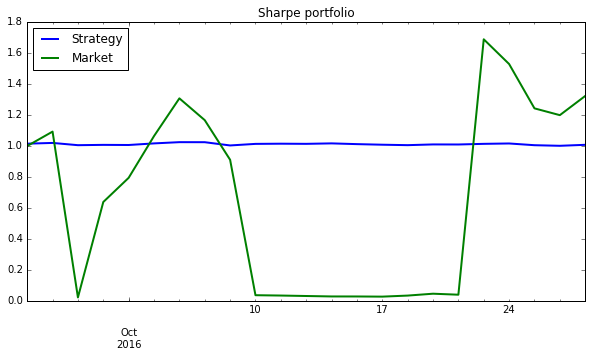

In [46]:
# Max-Sharpe portfolio - Backtest
df = pf_backtest(30,max_sharpe_portfolio,start)
df[['Strategy','Market']].cumsum().apply(np.exp).plot(title='Sharpe portfolio', figsize=(10,5), linewidth=2)


In [47]:
df2 = pf_backtest(30,xsection_mean_reversion_portfolio,start)

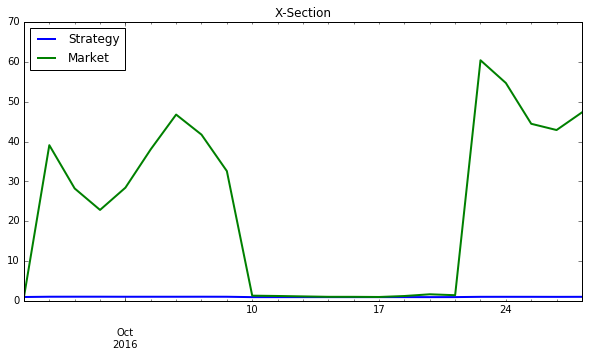

In [48]:
df2[['Strategy','Market']].cumsum().apply(np.exp).plot(title='X-Section', figsize=(10,5), linewidth=2);

In [49]:
## Generate today's portfolio
pf, metrics = max_sharpe_portfolio(data)

pf2, metrics2 = xsection_mean_reversion_portfolio(data)


In [50]:
print 50*'*'
print ' Portfolio with maximum Sharpe ratio'
print 50*'*'
print ' Portfolio returns (pct): ', 100*metrics[0]
print ' Portfolio volatility (pct): ', 100*metrics[1]
print ' Sharpe Ratio: ' , metrics[2]
print [(row[0],capital*row[1]) for row in pf if row[1]>0.0]


**************************************************
 Portfolio with maximum Sharpe ratio
**************************************************
 Portfolio returns (pct):  37.1
 Portfolio volatility (pct):  12.6
 Sharpe Ratio:  2.944
[(u'ALPEKA.MX', 1400.0), (u'ALSEA.MX', 3000.0), (u'ASURB.MX', 100.0), (u'CEMEXCPO.MX', 5200.0), (u'GAPB.MX', 2900.0), (u'GFREGIOO.MX', 8050.0), (u'IENOVA.MX', 3150.0), (u'KOFL.MX', 2150.0), (u'LABB.MX', 5550.0), (u'OHLMEX.MX', 1050.0), (u'OMAB.MX', 9900.0), (u'VOLARA.MX', 7450.0)]


**************************************************
 Stocks sorted by deviation from average returns
**************************************************


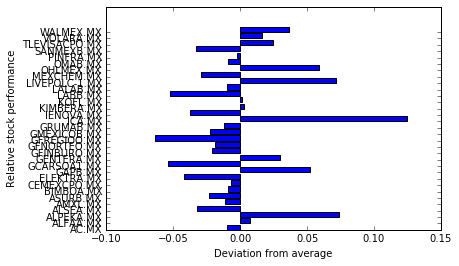

In [51]:
print 50*'*'
print ' Stocks sorted by deviation from average returns'
print 50*'*'

import matplotlib.pyplot as plt
ticks = [row[0] for row in pf2]
ypos = range(len(ticks))
coeffs = [row[1] for row in pf2]
#fig, ax = plt.subplots(figsize=(10,10))
#ax.barh(ypos, coeffs)
plt.barh(ypos, coeffs)
plt.yticks(ypos,ticks)
plt.xlabel('Deviation from average')
plt.ylabel('Relative stock performance')
plt.show()

In [52]:
pf2

[(u'AC.MX', -0.0096964174872683634),
 (u'ALFAA.MX', 0.0071193583473483542),
 (u'ALPEKA.MX', 0.074156364524117391),
 (u'ALSEA.MX', -0.032312286952077003),
 (u'AMXL.MX', -0.01114875840929281),
 (u'ASURB.MX', -0.023476337445424461),
 (u'BIMBOA.MX', -0.0090123619320914596),
 (u'CEMEXCPO.MX', -0.0066538670564143271),
 (u'ELEKTRA.MX', -0.041647080354275494),
 (u'GAPB.MX', 0.052147187060974612),
 (u'GCARSOA1.MX', -0.054176977084553955),
 (u'GENTERA.MX', 0.030142459026226039),
 (u'GFINBURO.MX', -0.02125672392640144),
 (u'GFNORTEO.MX', -0.019130522910471549),
 (u'GFREGIOO.MX', -0.063496516400727968),
 (u'GMEXICOB.MX', -0.022136872473295034),
 (u'GRUMAB.MX', -0.012405474138860903),
 (u'ICA.MX', 0.12433868079660175),
 (u'IENOVA.MX', -0.037586825389194278),
 (u'KIMBERA.MX', 0.0031953429473923511),
 (u'KOFL.MX', 0.001108456384499853),
 (u'LABB.MX', -0.052132171075741744),
 (u'LALAB.MX', -0.0096983469905584738),
 (u'LIVEPOLC-1.MX', 0.071705254858293363),
 (u'MEXCHEM.MX', -0.02929900972591078),
 (u'O